# **Twitter Casestudy - Named Entity Recognition (NER)**

### **Problem Statement**

Twitter is a microblogging and social networking service on which users post and interact with messages known as "tweets". Every second, on average, around 6,000 tweets are tweeted on Twitter, corresponding to over 350,000 tweets sent per minute, 500 million tweets per day.

Twitter wants to automatically tag and analyze tweets for better understanding of the trends and topics without being dependent on the hashtags that the users use. Many users do not use hashtags or sometimes use wrong or mis-spelled tags, so they want to completely remove this problem and create a system of recognizing important content of the tweets.

Named Entity Recognition (NER) is an important subtask of information extraction that seeks to locate and recognise named entities.

You need to train models that will be able to identify the various named entities.

### **Data Description**

Dataset is annotated with 10 fine-grained NER categories: person, geo-location, company, facility, product,music artist, movie, sports team, tv show and other. Dataset was extracted from tweets and is structured in CoNLL format., in English language. Containing in Text file format.

The CoNLL format is a text file with one word per line with sentences separated by an empty line. The first word in a line should be the word and the last word should be the label.

In [3]:
# importing libraries
import numpy as np
import pandas as pd
import string
import re
import random
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Define the file path
file_path = "wnut 16.txt.conll"


# Read the .conll file into a DataFrame
data = []
sentences = []
with open(file_path, 'r') as file:
    for line in file:
        line = line.strip()
        if line:
            tokens = line.split('\t')
            data.append(tokens)
        else:
            if data:
                sentences.append(data)
                data = []

# Create a DataFrame with Sentence, Token, and Tag columns
df_train = pd.DataFrame(columns=['Sentence', 'Token', 'Tag'])
for i, sentence in enumerate(sentences):
    for token in sentence:
        df_train = df_train.append({'Sentence': i+1, 'Token': token[0], 'Tag': token[1]}, ignore_index=True)

df_train.head()

,Sentence,Token,Tag
0,1,@SammieLynnsMom,O
1,1,@tg10781,O
2,1,they,O
3,1,will,O
4,1,be,O


In [5]:
# Define the file path
file_path = "wnut 16test.txt.conll"


# Read the .conll file into a DataFrame
data = []
sentences = []
with open(file_path, 'r') as file:
    for line in file:
        line = line.strip()
        if line:
            tokens = line.split('\t')
            data.append(tokens)
        else:
            if data:
                sentences.append(data)
                data = []

# Create a DataFrame with Sentence, Token, and POS columns
df_test = pd.DataFrame(columns=['Sentence', 'Token', 'Tag'])
for i, sentence in enumerate(sentences):
    for token in sentence:
        df_test=df_test.append({'Sentence': i+1, 'Token': token[0], 'Tag': token[1]}, ignore_index=True)

df_test.head()

,Sentence,Token,Tag
0,1,New,B-other
1,1,Orleans,I-other
2,1,Mother,I-other
3,1,'s,I-other
4,1,Day,I-other


In [6]:
df_train['Sentence']='sentence '+df_train['Sentence'].astype(str)
df_test['Sentence']='sentence '+(df_test['Sentence']+2393).astype(str)

In [7]:
df=pd.concat([df_train,df_test])
df.head()

,Sentence,Token,Tag
0,sentence 1,@SammieLynnsMom,O
1,sentence 1,@tg10781,O
2,sentence 1,they,O
3,sentence 1,will,O
4,sentence 1,be,O


In [8]:
df.shape

(108358, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108358 entries, 0 to 61895
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Sentence  108358 non-null  object
 1   Token     108358 non-null  object
 2   Tag       108358 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [10]:
# Count of unique values
print('No. of unique values: \n')
for i in df.columns:
    print(i," : ",df[i].nunique())

No. of unique values: 

Sentence  :  6242
Token  :  25379
Tag  :  21


In [11]:
n_tags = len(df.groupby(['Tag']))
print("Number of Labels: ", n_tags)

Number of Labels:  21


In [12]:
tags = list(set(df["Tag"].values))
print("Tags:", tags)

Tags: ['O', 'B-movie', 'B-person', 'I-facility', 'I-geo-loc', 'I-movie', 'I-product', 'B-other', 'I-person', 'I-tvshow', 'B-sportsteam', 'I-other', 'B-musicartist', 'I-company', 'I-musicartist', 'B-geo-loc', 'I-sportsteam', 'B-tvshow', 'B-product', 'B-company', 'B-facility']


In [13]:
df['Tag'].value_counts()

O                99941
B-geo-loc         1158
B-person           931
I-other            876
B-other            809
B-company          792
I-product          580
I-person           515
I-facility         471
B-facility         357
B-product          343
I-company          301
I-geo-loc          268
B-musicartist      246
I-musicartist      201
B-sportsteam       198
I-movie             94
I-sportsteam        71
I-tvshow            71
B-movie             68
B-tvshow            67
Name: Tag, dtype: int64

In [14]:
print('Number of sentences are '+str(df['Sentence'].nunique()))
print('Number of Vocabs are '+str(df['Token'].nunique()))

Number of sentences are 6242
Number of Vocabs are 25379


### **Exploratory Data Analysis**

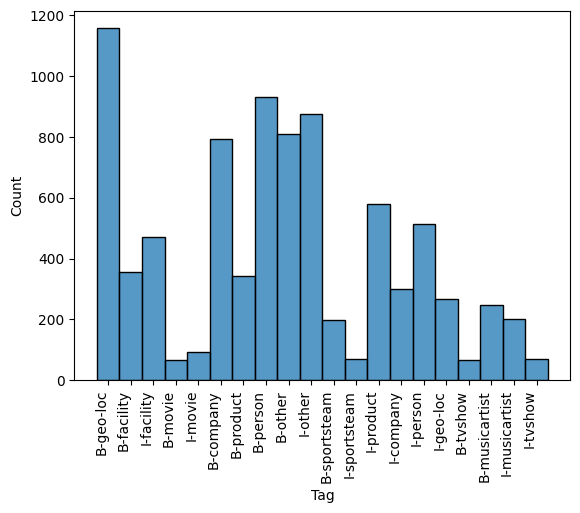

In [15]:
# Distribution of tags on data
sns.histplot(df[df['Tag']!='O']['Tag'])
plt.xticks(rotation=90, ha='right')
plt.show()

<Axes: >

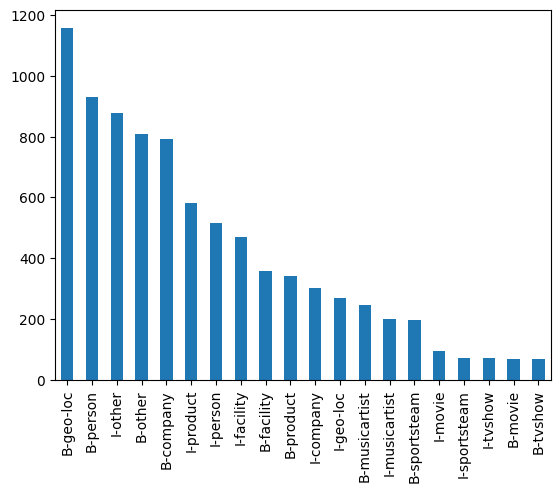

In [16]:
df[df.Tag != "O"]["Tag"].value_counts().plot(kind="bar")

In [17]:
df_t = df[df.Tag != "O"]["Tag"].value_counts().reset_index()
df_t[["Boundary", "Class"]] = df_t["index"].str.split("-", 1, expand=True)
df_t

,index,Tag,Boundary,Class
0,B-geo-loc,1158,B,geo-loc
1,B-person,931,B,person
2,I-other,876,I,other
3,B-other,809,B,other
4,B-company,792,B,company
5,I-product,580,I,product
6,I-person,515,I,person
7,I-facility,471,I,facility
8,B-facility,357,B,facility
9,B-product,343,B,product


In [18]:
# ! pip install -U seaborn

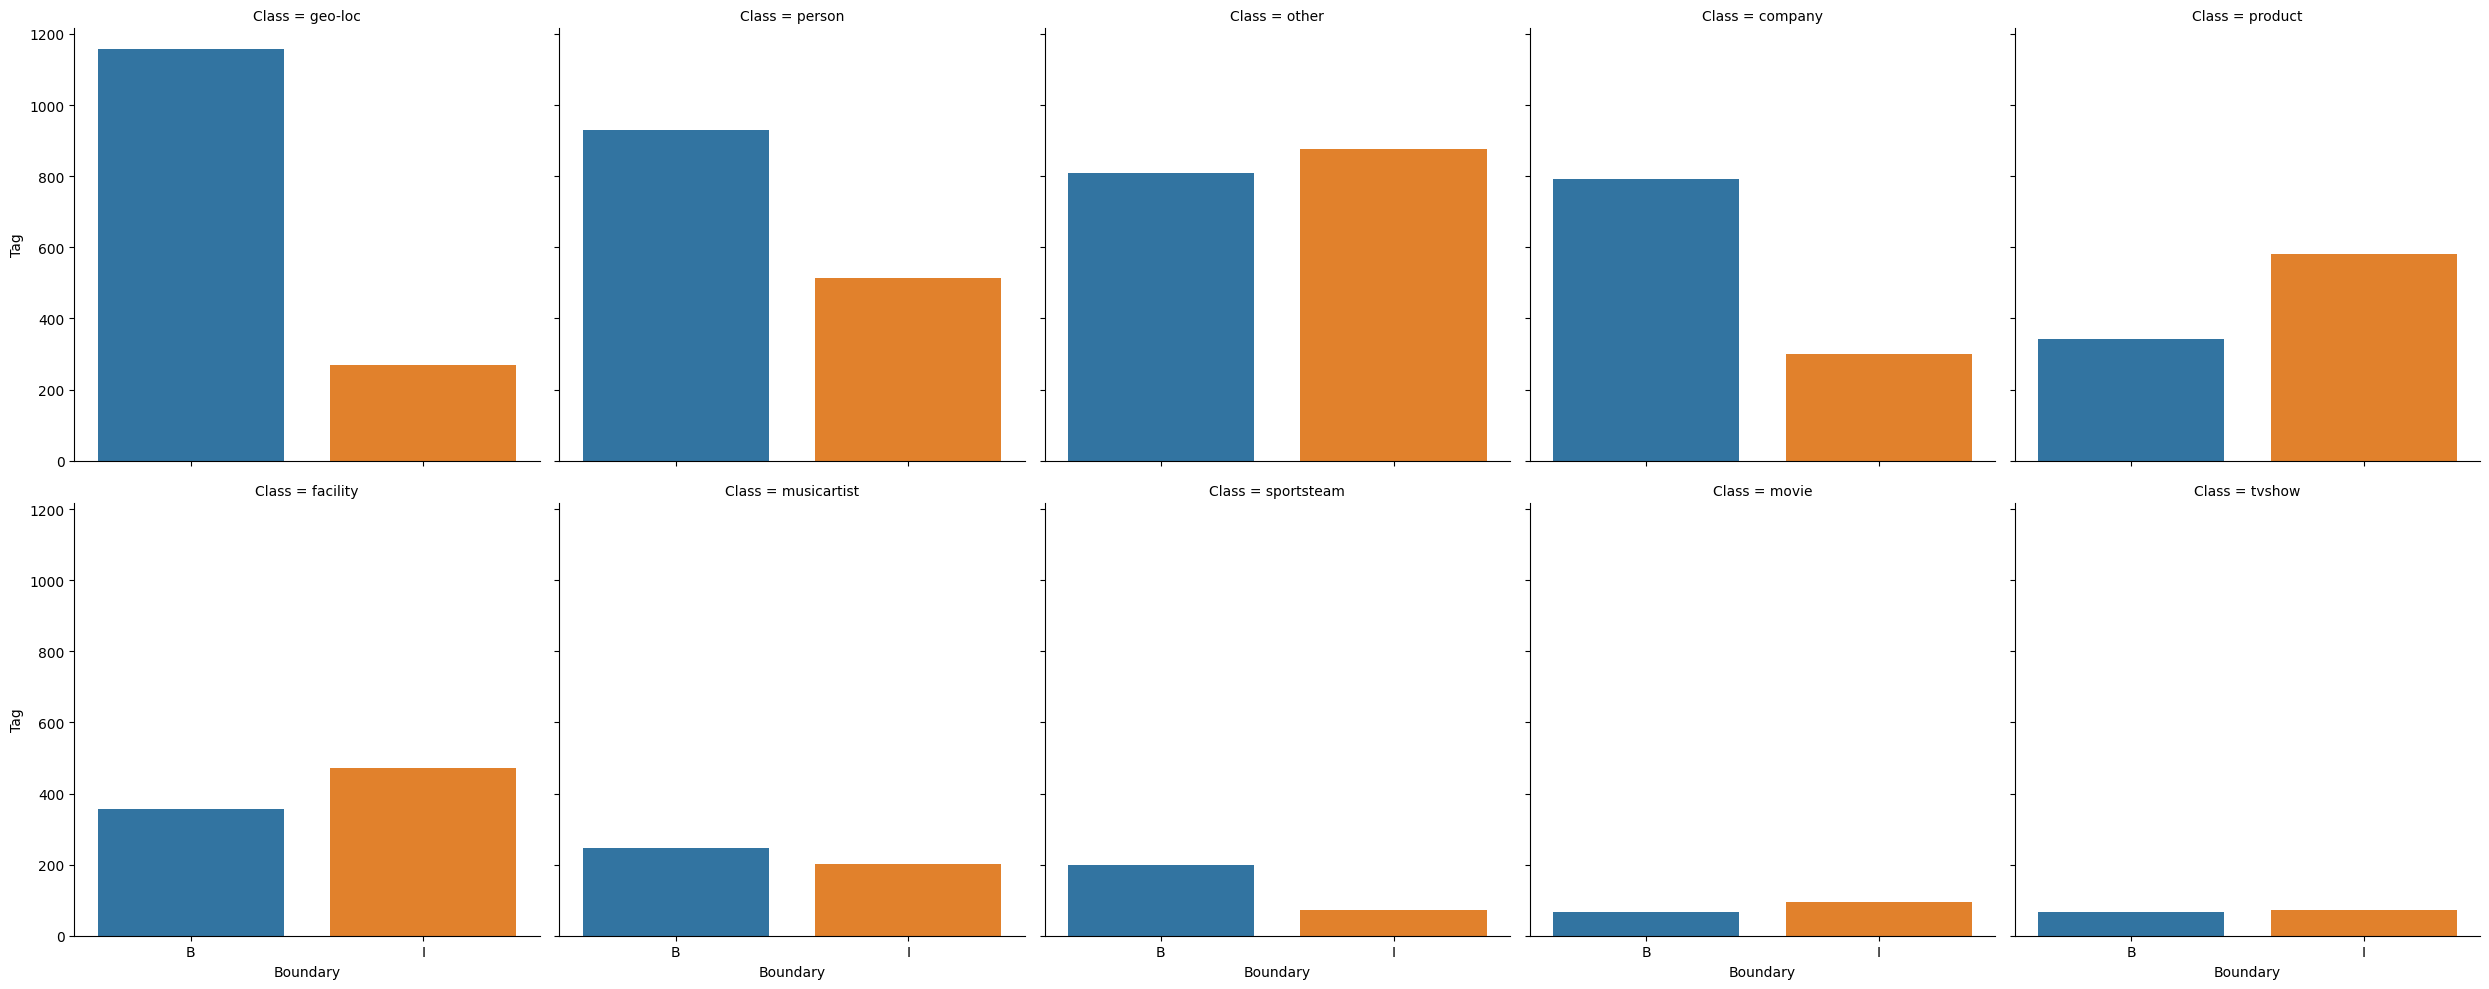

In [19]:
sns.catplot(x="Boundary", y="Tag", col="Class", data=df_t, col_wrap=5, kind="bar")

There is imbalance in the dataset. Person, Other and loc has the highest count compare to other tags.

In [20]:
def load_data(filename: str):
  # Conll file is stored as (token, tag) pairs, one per line
  # Extracting data from conll files
  with open(filename, 'r') as file:
    lines = [line[:-1].split() for line in file] # Skipping last line as it will be a blank space
  samples, start = [], 0
  for end, parts in enumerate(lines):
      if not parts:
          sample = [(token, tag)
                      for token, tag in lines[start:end]]
          samples.append(sample)
          start = end + 1
  if start < end:
    samples.append(lines[start:end])
  return samples

train_samples = load_data('wnut 16.txt.conll')
test_samples = load_data('wnut 16test.txt.conll')
samples = train_samples + test_samples
schema = ['_'] + sorted({tag for sentence in samples
                             for _, tag in sentence}) # '_' is used to indicate a null (blank) token

In [21]:
from collections import defaultdict
all_samples = train_samples
all_samples.extend(test_samples)

word_counts = defaultdict(int) # Calculate vocab size
max_len = 0 # Calculate max length of a sentence

for sample in all_samples:
  for word in sample:
    word_counts[word[0]]+=1

  max_len = max(max_len, len(sample))

n_words = len(word_counts.items())

print("Max Length: ", max_len)
print("Vocab Size: ", n_words)

Max Length:  39
Vocab Size:  25382


### **LSTM - CRF Model**

In [ ]:
import tensorflow as tf

# Hyperparams if GPU is available
if tf.test.is_gpu_available():
    BATCH_SIZE = 512  # Number of examples used in each iteration
    EPOCHS = 5  # Number of passes through entire dataset
    MAX_LEN = 75  # Max length of review (in words)
    EMBEDDING = 40  # Dimension of word embedding vector
# Hyperparams for CPU training
else:
    BATCH_SIZE = 32
    EPOCHS = 5
    MAX_LEN = 75
    EMBEDDING = 20

In [25]:
import gensim.downloader as api
word2vec = api.load("word2vec-google-news-300") # Use a word2vec model to initialize embeddings
embedding_dim = 300

[==================================================] 100.0% 1662.8/1662.8MB downloaded


**Training a Tensorflow Tokenizer for LSTM input embeddings**

In [26]:
import tensorflow as tf
all_sentences = []
for sample in all_samples:
  sentence = [tag[0] for tag in sample]
  all_sentences.append(sentence)

crf_tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=n_words, lower=True)
crf_tokenizer.fit_on_texts(all_sentences)

In [27]:
num_tokens = len(crf_tokenizer.word_index) + 1
hits = 0
misses = 0
missed_words = []


# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in crf_tokenizer.word_index.items():
  embedding_vector = None
  try:
    embedding_vector = word2vec[word]
  except Exception :
    pass

  if embedding_vector is not None:
    # Words not found in embedding index will be all-zeros.
    # This includes the representation for "padding" and "OOV"
    embedding_matrix[i] = embedding_vector
    hits += 1
  else:
    missed_words.append(word)
    misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 9676 words (12257 misses)


In [28]:
# Creating a training dataset

tag2id = {} # Label to indicies mapping
id2tag = {} # Index to label mapping
for i, tag in enumerate(schema):
  tag2id[tag] = i
  id2tag[i] = tag

In [29]:
def get_dataset(samples, max_len, tag2id, tokenizer):
  '''Prepares the input dataset

  Args:
    `samples`: List[List[Tuple[word, tag]]], input data
    `max_len`: Maximum input length
    `tag2id`: Mapping[tag: integer]
    `tokenizer`: Tensorflow tokenizer, for tokenizing input sequence

  Returns:
    Tuple[np.ndarray, np.ndarray]: sentences and it's labels
  '''
  dataset = {'samples':[], 'labels': []}

  for sample in samples:
    # Extracting inputs and labels
    inputs = [x[0] for x in sample]
    outputs = [x[1] for x in sample]

    # Tokenizing inputs
    inputs = tokenizer.texts_to_sequences([inputs])[0]

    # padding labels
    padded_inputs = [inputs[i] if i < len(inputs) else 0 for i in range(max_len)]

    # Initializing labels as One Hot Encoded Vectors
    padded_labels = [[0 for i in range(len(tag2id))] for j in range(max_len)]
    for i in range(len(outputs)):
      padded_labels[i][tag2id[outputs[i]]] = 1

    # Adding padded inputs & labels to dataset
    dataset['samples'].append(padded_inputs)
    dataset['labels'].append(padded_labels)

  return np.array(dataset['samples']), np.array(dataset['labels'])

train_sentences, train_labels = get_dataset(train_samples, max_len, tag2id, crf_tokenizer)
test_sentences, test_labels = get_dataset(test_samples, max_len, tag2id, crf_tokenizer)

In [30]:
%pip install datasets transformers
%pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 5.4 MB/s eta 0:00:00


In [31]:
from keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow_addons.utils.types import FloatTensorLike, TensorLike

# LSTM components
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional

# CRF layer
from tensorflow_addons.layers import CRF

# Sigmoid focal cross entropy loss works well with highly unbalanced input data
from tensorflow_addons.losses import SigmoidFocalCrossEntropy
from tensorflow_addons.optimizers import AdamW

We use **Sigmoid Focal Cross Entropy loss**  as it performs better than Sparse Categorical Cross Entropy for highly imbalanced data.

In [32]:
def build_model():
  # Model definition
  input = Input(shape=(max_len,))

  # Get embeddings
  embeddings = Embedding(input_dim=embedding_matrix.shape[0],
                      output_dim=embedding_dim,
                      input_length=max_len, mask_zero=True,
                      embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix)
                    )(input)

  # variational biLSTM
  output_sequences = Bidirectional(LSTM(units=50, return_sequences=True))(embeddings)

  # Stacking
  output_sequences = Bidirectional(LSTM(units=50, return_sequences=True))(output_sequences)

  # Adding more non-linearity
  dense_out = TimeDistributed(Dense(25, activation="relu"))(output_sequences)

  # CRF layer
  crf = CRF(len(schema), name='CRF_model')
  predicted_sequence, potentials, sequence_length, crf_kernel = crf(dense_out)

  model = Model(input, potentials)
  model.compile(optimizer=AdamW(weight_decay=0.001),
      loss= SigmoidFocalCrossEntropy(),metrics = ['accuracy', 'Precision', 'Recall']) # Sigmoid focal cross entropy loss

  return model


In [33]:
model = build_model()

# Checkpointing
save_model = tf.keras.callbacks.ModelCheckpoint(filepath='twitter_ner_crf.h5',
                        monitor='val_loss',
                        save_weights_only=True,
                        save_best_only=True,
                        verbose=1)

# Early stopping
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=10)

callbacks = [save_model, es]

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 39)]              0         
                                                                 
 embedding (Embedding)       (None, 39, 300)           6580200   
                                                                 
 bidirectional (Bidirection  (None, 39, 100)           140400    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 39, 100)           60400     
 onal)                                                           
                                                                 
 time_distributed (TimeDist  (None, 39, 25)            2525      
 ributed)                                                        
                                                             

In [34]:
history  = model.fit(train_sentences, train_labels, validation_data = (test_sentences, test_labels),epochs = 200,
          callbacks  = callbacks,shuffle=True)

Epoch 1/200


196/196 [==============================] - ETA: 0s - loss: 0.0804 - accuracy: 0.4083 - precision: 0.9204 - recall: 0.5579
Epoch 1: val_loss improved from inf to 0.05321, saving model to twitter_ner_crf.h5
196/196 [==============================] - 60s 122ms/step - loss: 0.0804 - accuracy: 0.4083 - precision: 0.9204 - recall: 0.5579 - val_loss: 0.0532 - val_accuracy: 0.3726 - val_precision: 0.9178 - val_recall: 0.5951
Epoch 2/200
196/196 [==============================] - ETA: 0s - loss: 0.0404 - accuracy: 0.4105 - precision: 0.9361 - recall: 0.7356
Epoch 2: val_loss improved from 0.05321 to 0.03933, saving model to twitter_ner_crf.h5
196/196 [==============================] - 13s 66ms/step - loss: 0.0404 - accuracy: 0.4105 - precision: 0.9361 - recall: 0.7356 - val_loss: 0.0393 - val_accuracy: 0.3726 - val_precision: 0.9326 - val_recall: 0.7328
Epoch 3/200
196/196 [==============================] - ETA: 0s - loss: 0.0337 - accuracy: 0.4105 - precision: 0.9491 - recall: 0.8107
Epoch 3: 

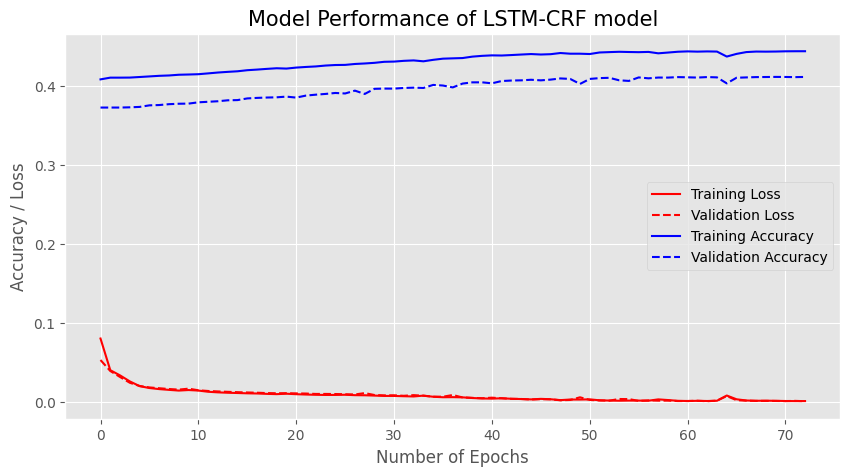

In [35]:
# Plot the loss graph and accuracy graph
h = history.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.title('Model Performance of LSTM-CRF model', fontsize=15)
plt.ylabel("Accuracy / Loss")
plt.legend(loc='best')
plt.show()

In [36]:
model.load_weights('twitter_ner_crf.h5')

In [37]:
crf_model = tf.keras.Model(inputs=model.input, outputs=[model.output, model.get_layer('CRF_model').output, model.input])

In [38]:
def calculate_accuracy(y_true, y_pred):
  '''Convert categorical one hot encodings to indices and compute accuracy

  Args:
    `y_true`: true values
    `y_pred`: model predictions

  Returns:
    Integer, accuracy of prediction
  '''
  acc_metric = tf.keras.metrics.Accuracy()
  y_true = tf.argmax(y_true, axis=-1)
  return acc_metric(y_true, y_pred).numpy().item()

In [39]:
def calculate_model_accuracy(crf_model, test_sentences, test_labels):
  '''Calculates average validation accuracy of model'''

  # Batch the dataset
  batched_validation_set = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels)).batch(32)

  average_acc = 0
  # Iterate through batches
  for batch_test_sentences, batch_test_labels in batched_validation_set:
    predicted_labels, _, _, _ = crf_model(batch_test_sentences)[1]
    average_acc += calculate_accuracy(batch_test_labels, predicted_labels)

  average_acc/=len(batched_validation_set)
  return average_acc


In [40]:
average_acc_train = calculate_model_accuracy(crf_model, train_sentences, train_labels)
average_acc_test = calculate_model_accuracy(crf_model, test_sentences, test_labels)
print('For LSTM-CRF model,\n')
print(f" > Average accuracy of model on train set: {average_acc_train:.3f}")
print(f" > Average accuracy of model on test set: {average_acc_test:.3f}")

For LSTM-CRF model,

 > Average accuracy of model on train set: 0.994
 > Average accuracy of model on test set: 0.994


### **Transformer model using BERT**

In [41]:
from transformers import AutoConfig, TFAutoModelForTokenClassification, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased') # Load bert-base-uncased tokenizer

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [42]:
sample=train_samples[6] # Random tokenized sample
for token, tag in sample:
  for subtoken in tokenizer(token)['input_ids'][1:-1]:
    print(token,' - ',subtoken)

@Hollly_  -  1030
@Hollly_  -  7570
@Hollly_  -  3363
@Hollly_  -  2135
@Hollly_  -  1035
16  -  2385
b  -  1038
17  -  2459
in  -  1999
feb  -  13114


In [43]:
import tqdm

def tokenize_sample(sample):
  # Expand label to all subtokens and add 'O' label to start and end tokens
  seq = [
    (subtoken, tag)
    for token, tag in sample
    for subtoken in tokenizer(token.lower())['input_ids'][1:-1]
  ]
  return [(3, 'O')] + seq + [(4, 'O')]

In [44]:
def preprocess(samples, tag2id):
  tokenized_samples = list((map(tokenize_sample, samples)))
  max_len = max(map(len, tokenized_samples))

  # Subtokens
  X_input_ids = np.zeros((len(samples), max_len), dtype=np.int32)

  # Masks
  X_input_masks = np.zeros((len(samples), max_len), dtype=np.int32)

  # labels
  y = np.zeros((len(samples), max_len), dtype=np.int32)

  for i, sentence in enumerate(tokenized_samples):
    for j in range(len(sentence)):
      X_input_masks[i, j] = 1
    for j, (subtoken_id, tag) in enumerate(sentence):
      X_input_ids[i, j] = subtoken_id
      y[i, j] = tag2id[tag]
  return (X_input_ids, X_input_masks), y


In [45]:
X_train, y_train = preprocess(train_samples, tag2id)
X_test, y_test = preprocess(test_samples, tag2id)

In [47]:
config = AutoConfig.from_pretrained('bert-base-uncased', num_labels=len(schema), id2tag=id2tag, tag2id=tag2id) # Bert config
model = TFAutoModelForTokenClassification.from_pretrained('bert-base-uncased', config=config) # Loading Bert model
model.summary()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForTokenClassification.

Some weights or buffers of the TF 2.0 model TFBertForTokenClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_bert_for_token_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  108891648 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  16918     
                                                                 
Total params: 108908566 (415.45 MB)
Trainable params: 108908566 (415.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
BATCH_SIZE=32

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001) # Creating optimizer

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics = metric)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=10,batch_size=BATCH_SIZE)

Epoch 1/10
157/157 [==============================] - 219s 1s/step - loss: 0.1624 - accuracy: 0.9611 - val_loss: 0.0637 - val_accuracy: 0.9856
Epoch 2/10
157/157 [==============================] - 176s 1s/step - loss: 0.0443 - accuracy: 0.9895 - val_loss: 0.0456 - val_accuracy: 0.9887
Epoch 3/10
157/157 [==============================] - 168s 1s/step - loss: 0.0255 - accuracy: 0.9935 - val_loss: 0.0377 - val_accuracy: 0.9900
Epoch 4/10
157/157 [==============================] - 168s 1s/step - loss: 0.0156 - accuracy: 0.9960 - val_loss: 0.0367 - val_accuracy: 0.9906
Epoch 5/10
157/157 [==============================] - 175s 1s/step - loss: 0.0110 - accuracy: 0.9972 - val_loss: 0.0401 - val_accuracy: 0.9914
Epoch 6/10
157/157 [==============================] - 176s 1s/step - loss: 0.0080 - accuracy: 0.9980 - val_loss: 0.0427 - val_accuracy: 0.9901
Epoch 7/10
157/157 [==============================] - 176s 1s/step - loss: 0.0059 - accuracy: 0.9985 - val_loss: 0.0452 - val_accuracy: 0.9910

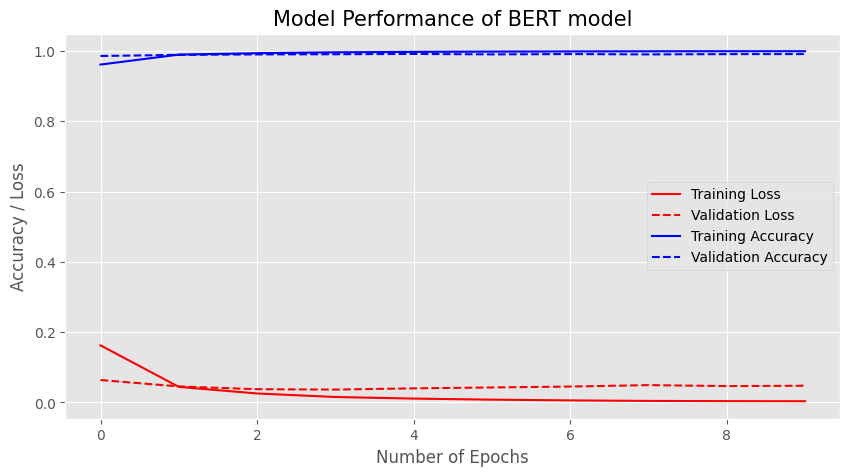

In [49]:
# Plot the loss graph and accuracy graph
h = history.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.title('Model Performance of BERT model', fontsize=15)
plt.ylabel("Accuracy / Loss")
plt.legend(loc='best')
plt.show()

In [50]:
def aggregate(sample, predictions):
  results = []
  i = 1
  for token, y_true in sample:
      nr_subtoken = len(tokenizer(token.lower())['input_ids']) - 2 # Extracting word tokens
      pred = predictions[i:i+nr_subtoken] # Extracting predictions
      i += nr_subtoken
      y_pred = schema[np.argmax(np.sum(pred, axis=0))] # Get label of prediction
      results.append((token, y_true, y_pred))
  return results


In [51]:
# Tuple(token, true label, model prediction)
y_pred = model.predict(X_test)[0]
predictions = [aggregate(sample, predictions)  for sample, predictions in zip(test_samples, y_pred)]

121/121 [==============================] - 43s 334ms/step


In [52]:
model.save_pretrained("output/NER_pretrained")

### **Model Performance Evaluation**

In [53]:
def tokenize_bert(sentence):
  sentence_tokens = tokenizer(sentence.split(' '))['input_ids'] # Splitting sentence into word tokens
  ner_tokens = [3] # Start token
  for word_token in sentence_tokens:
    ner_tokens.extend(word_token[1:-1]) # Adding tokenized word token indicies
  ner_tokens += [4] # End token
  return ner_tokens

In [57]:
sentence ="The MacBook is a brand of Mac notebook computers designed and marketed by Apple Inc. that use Apple's macOS operating system since 2006."

**Transformer Model using BERT**

In [58]:
# Bert tokenization
bert_tokens = tokenize_bert(sentence)

def align_labels_to_input(sentence, predictions):
  sentence_tokens = sentence.lower().split(" ")
  results = []

  i = 1
  # Extracting labels corresponding to tokens
  for token in sentence_tokens:
      nr_subtoken = len(tokenizer(token)['input_ids']) - 2
      pred = predictions[i:i+nr_subtoken]
      i += nr_subtoken
      y_pred = id2tag[np.argmax(np.sum(pred, axis=0))]
      results.append((token, y_pred))
  return results


bert_logits = model.predict([bert_tokens], verbose=0).logits

align_labels_to_input(sentence, bert_logits[0])


[('the', 'O'),
 ('macbook', 'I-product'),
 ('is', 'O'),
 ('a', 'O'),
 ('brand', 'O'),
 ('of', 'O'),
 ('mac', 'B-product'),
 ('notebook', 'I-product'),
 ('computers', 'O'),
 ('designed', 'O'),
 ('and', 'O'),
 ('marketed', 'O'),
 ('by', 'O'),
 ('apple', 'B-company'),
 ('inc.', 'I-company'),
 ('that', 'O'),
 ('use', 'O'),
 ("apple's", 'O'),
 ('macos', 'I-product'),
 ('operating', 'O'),
 ('system', 'O'),
 ('since', 'O'),
 ('2006.', 'O')]

**LSTM-CRF Model**

In [59]:
from pprint import pprint # Pretty print package

# CRF tokenization
crf_tokens = crf_tokenizer.texts_to_sequences([sentence])

crf_padded_tokens = [[crf_tokens[0][x] if x < len(crf_tokens[0]) else 0 for x in range(39)]]
crf_preds, _, _, _ = crf_model.predict(crf_padded_tokens, verbose=0)[1]

crf_preds = [id2tag[x] for x in crf_preds[0]] # Convert indicies into predictions


# Get aligned inputs with labels
input_word_tokens = [crf_tokenizer.sequences_to_texts([[x]])[0] for x in crf_padded_tokens[0]]

# Only printing non-padded tokens with their labels
pprint(list(zip(input_word_tokens[:len(crf_tokens[0])], crf_preds[:len(crf_tokens[0])])))

[('the', 'B-product'),
 ('macbook', 'O'),
 ('is', 'O'),
 ('a', 'O'),
 ('brand', 'O'),
 ('of', 'O'),
 ('mac', 'B-company'),
 ('designed', 'O'),
 ('and', 'O'),
 ('by', 'O'),
 ('apple', 'B-product'),
 ('inc', 'I-facility'),
 ('that', 'O'),
 ('use', 'O'),
 ('system', 'O'),
 ('since', 'O')]


# **Questions & Answers**

### **1.Defining the problem statement and where can this and modifications of this be used?**
#### **Problem Statement of Twitter Casestudy:**

To develop a Named Entity Recognition (NER) system for Twitter that can automatically tag and analyze tweets without relying on user-generated hashtags. Twitter aims to enhance its understanding of trends and topics by recognizing important content within tweets. The challenge lies in the fact that many users either do not use hashtags or may use incorrect or misspelled tags. The goal is to create models capable of identifying various named entities within the vast volume of tweets generated on the platform.

#### **Applications and Modifications:**

* **Enhanced Trend Analysis:** The developed NER models can significantly improve Twitter's trend analysis by accurately identifying and categorizing named entities within tweets. This can provide a more comprehensive and precise overview of the topics and discussions happening on the platform.

* **Content Recommendation:** Understanding the named entities mentioned in tweets can enable Twitter to provide more relevant content recommendations to users based on their interests and preferences.

* **Ad Targeting:** Accurate identification of named entities can enhance Twitter's ability to target advertisements more effectively, ensuring that users receive ads related to their interests and activities.

* **Real-time Event Monitoring:** The NER models can be applied to monitor and analyze real-time events, allowing Twitter to quickly identify and respond to emerging topics, crises, or breaking news.

* **User Engagement Analysis:** Analyzing named entities within tweets can provide insights into user engagement with specific topics, helping Twitter understand user behavior and preferences.

* **Language Understanding and Sentiment Analysis:** Recognizing named entities contributes to a deeper understanding of the language used in tweets, facilitating sentiment analysis and sentiment-driven insights.

#### **Key Challenges:**

* **Noisy Data:** Twitter data often includes slang, abbreviations, and misspellings, making it challenging to accurately identify named entities.

* **Scalability:** Given the massive volume of tweets generated every second, the system must be scalable to handle the computational load efficiently.

* **Diversity of Named Entities:** Twitter discussions can involve various named entities, including people, locations, organizations, events, etc. The model needs to be versatile in recognizing diverse entity types.



### **2. Explain the data format (CoNLL BIO format)**

The CoNLL BIO format is a widely used data format for representing labeled entities in a text corpus. It uses the BIO notation, where each token in a sequence is tagged with a label indicating whether it is the beginning (B), inside (I), or outside (O) of an entity. For example:

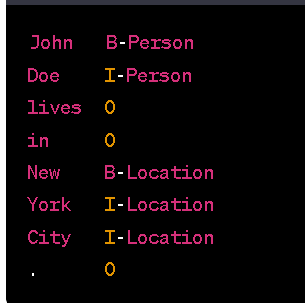



## **3. What other NER data annotation formats are available, and how are they different?**

Other NER data annotation formats include IOB (Inside, Outside, Beginning), BILOU (Beginning, Inside, Last, Outside, Unit), and more. They differ in how they handle boundaries of entities. For example, BILOU distinguishes between single-token entities and multi-token entities.

### **4. Why do we need tokenization of the data in our case?**

Tokenization is necessary for breaking down text into smaller units (tokens) for processing. In the case of NER, tokenization is crucial to provide the model with structured input, standardize input size, and capture the sequential nature of language, which is essential for understanding context.

### **5. What other models can you use for this task?**

Various models can be used for NER tasks, including traditional machine learning models like Conditional Random Fields (CRF), rule-based models, and more recent deep learning models like Bidirectional LSTMs, Transformer-based models (e.g., BERT, GPT), and their variants.

### **6. Did early stopping have any effect on the training and results**

The impact of early stopping depends on the specific training scenario. Early stopping is a regularization technique that can prevent overfitting. It stops training when the model's performance on a validation set ceases to improve. Its effect can be positive as it helps prevent the model from memorizing noise in the training data, leading to better generalization.

### **7. How does the BERT model expect a pair of sentences to be processed?**

BERT can handle both single sentences and pairs of sentences. When processing a pair of sentences, they are concatenated with a special separator token ([SEP]). Additionally, a segment embedding is added to each token to indicate to which sentence it belongs. BERT processes the entire sequence in a bidirectional manner, capturing contextual information from both sentences.

### **8. Why choose Attention-based models over Recurrent based ones?**

Attention-based models, especially transformer architectures like BERT, are preferred over recurrent-based models due to their ability to capture long-range dependencies more effectively. Attention mechanisms allow the model to focus on different parts of the input sequence simultaneously, addressing the vanishing gradient problem associated with recurrent models. Transformers are also more parallelizable, making them computationally efficient.

### **9. Differentiate BERT and Simple Transformers**

BERT is a specific pre-trained transformer-based model developed by Google, while Simple Transformers is a library that provides a high-level interface for working with various transformer-based models, including BERT. Simple Transformers simplifies the process of using transformer models for various NLP tasks, offering a user-friendly API. It acts as a wrapper around Hugging Face's Transformers library, making it easier to implement and experiment with these models without dealing with low-level details.

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

**Submitted by : Mrudula A P**